### Student Details



```
# This is formatted as code
```

Student Name: Ahmad Rashidh Ameer Hamsha

Student ID: 23264306

# Task 2: Probability Theory

1.A gamble is placed depending on the result of the dice.
This result of a dice roll is a uniform distribution, as all dice outcomes are equally likely; 1/6 probablility
The result is discrete as the result of a dice throw can only take on values of: 1,2,3,4,5,6

if dice = 1,2,3 will lose -1
if dice = 4 will draw, 0
if dice = 5 will win, 1
if dice = 6 will win, 2
We know this is a fair game theoretically, but what will the simulations show?

Simulate 1000 dice results and record both the result of the dice, and the result of the gamble.
To then calculate the expected value & standard deviation of both the result of the dice and the result of the gamble.

Finally plot the frequency of the dice rolls & plotting the frequency of the gamble result.



In [ ]:
import numpy as np
from matplotlib import pyplot as plot
import random

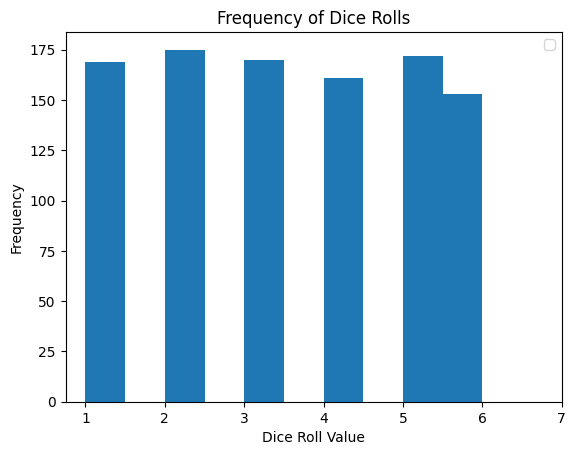

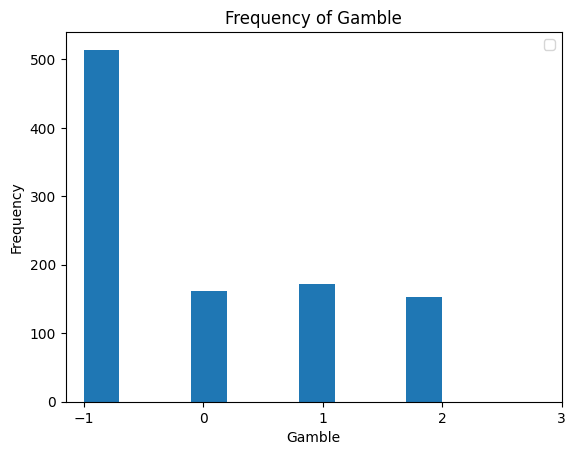

In [ ]:
no_of_simulations = 1000
result_dice = []
result_gamble = []

for _ in range(no_of_simulations):
  dice_roll_val = random.randint(1,6)
  result_dice.append(dice_roll_val)
  if dice_roll_val in [1,2,3]:
    result_gamble.append(-1)
  elif dice_roll_val == 4:
    result_gamble.append(0)
  elif dice_roll_val == 5:
    result_gamble.append(1)
  else:
    result_gamble.append(2)

exp_val_dice = np.mean(result_dice)
exp_val_gamble = np.mean(result_gamble)
std_dice = np.std(result_dice)
std_gamble = np.std(result_gamble)

plot.hist(result_dice)
plot.xlabel('Dice Roll Value')
plot.ylabel('Frequency')
plot.title('Frequency of Dice Rolls')
plot.xticks(range(1, 8))
plot.legend()
plot.show()

plot.hist(result_gamble)
plot.xlabel('Gamble')
plot.ylabel('Frequency')
plot.title('Frequency of Gamble')
plot.xticks(range(-1, 4))
plot.legend()
plot.show()


2.Test results of some made up exam/test/whatever really
This will be a normally distributed variable, and will be continious as test result could take on any value
How much would it costs to pay people for good scores?

Using properties of Normal Distribution
We expect 99.7% of data within mean +- 3( std . dev)
So marks would be roughly within 0-100, using a mean of 50, and std of 15
Going to consider paying students for grades below:

If test result < 50 , get nothing
If test result is between 50 & 75 = 5
If test result is between 75 & 100 = 10
Going to run for 10,000 simulations

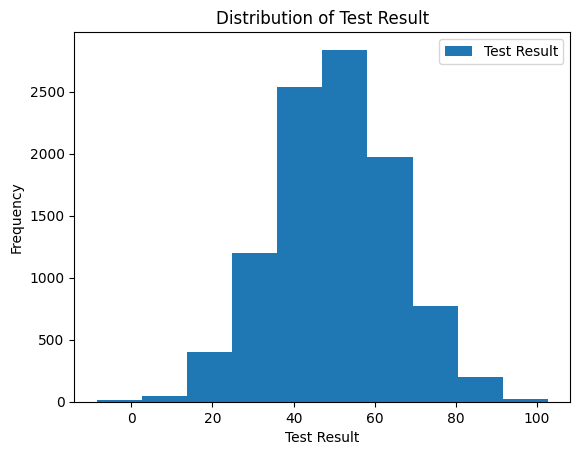

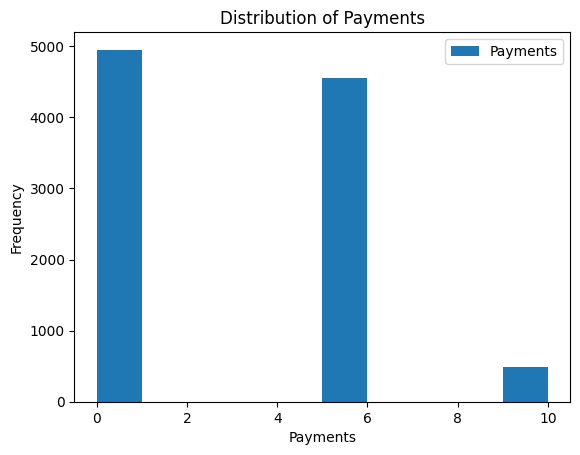

In [ ]:
no_of_simulations = 10000
test_result = [random.gauss(50, 15) for _ in range(no_of_simulations)]
payments = []

for mark in test_result:
  if mark < 50:
    payments.append(0)
  elif mark >= 50 and mark <= 75:
    payments.append(5)
  elif mark >= 75 and mark <= 100:
    payments.append(10)

plot.hist(test_result, label="Test Result")
plot.xlabel('Test Result')
plot.ylabel('Frequency')
plot.title('Distribution of Test Result')
plot.legend()
plot.show()

plot.hist(payments, label="Payments")
plot.xlabel('Payments')
plot.ylabel('Frequency')
plot.title('Distribution of Payments')
plot.legend()
plot.show()

## Manual Calculations

(Provide details of the manual calculations)

In [ ]:
# Your code

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

<Axes: xlabel='Height', ylabel='Weight'>

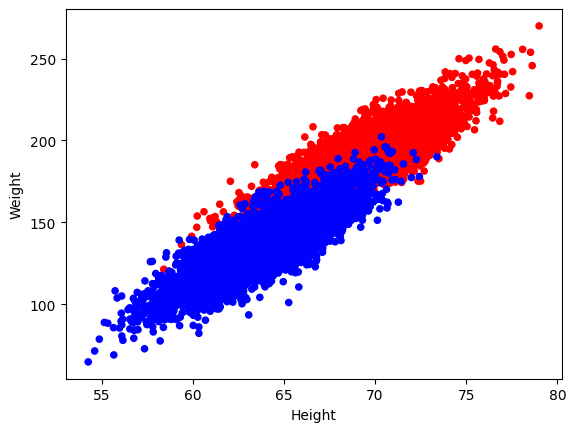

In [ ]:
colors = {'Male':'red','Female':'blue'}

data.plot(kind='scatter',x='Height',y='Weight',c=data.Gender.map(colors))

###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size=0.33)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)

y_pred = model.predict(X_test);

print(y_pred)
print("-------")
print(y_test.values)

['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
-------
['Male' 'Female' 'Male' ... 'Male' 'Female' 'Female']


### Test the algorithm
Using the test data

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8905970149253731


### Plot the random samples

<Axes: xlabel='Height', ylabel='Weight'>

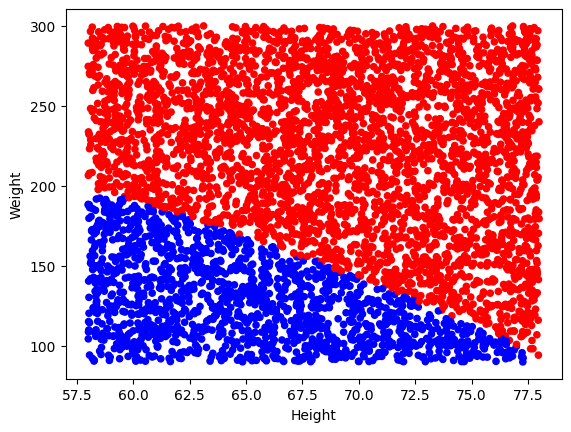

In [ ]:

no_of_samples = 5000
random_heights = np.random.uniform(58, 78, no_of_samples)
random_weights = np.random.uniform(90, 300, no_of_samples)
random_data = pandas.DataFrame({'Height': random_heights, 'Weight': random_weights})

predicted_gender = model.predict(random_data)
predicted_gender_data = pandas.Series(predicted_gender)

random_data.plot(kind='scatter',x='Height',y='Weight',c=predicted_gender_data.map(colors))


# Task 4: Exploration


Reinforcement learning (RL) is machine learning that has the ability to make decisions by interacting with the real-world environment. It seems closest to the human learning. The human learning follows the process of contemplating from what we come to know, as well as feedback from trial. Due to this closeness, RL found applications in various domains where it is nearly impossible to acquire data and the learning evolves from dynamic and adaptive systems. Some of the examples are self-driving car, autonomous robots and healthcare.

Out of the above application, application of RL in Healthcare is prominent and intriguing. In healthcare, it is significant to evolve treatment based on past experiences and apply the vast experience in further diagnosis to reduce longer treatment protocols. Recent success in the application of RL in healthcare is in creation and configuration of DTR (Dynamic Treatment Regimes) for patients with chronic/long-term conditions. The DTRs govern the healthcare conditions like treatment type, drugs, next appointments based on the previous experience on the same or different patients.

Besides that, RL is also applied in medical diagnosis and therefore could automate medical consultation. Automatic medical diagnosis map the patient information, medical history to correct disease diagnosis.

Healthcare is more dynamic field, in addition that need to adapt to various factors and experience. The field also doesn't have data to be fed to other machine learning systems. Reinforcement learning suits and acts as better application in Healthcare.